# Task 3 : Build a simple Linear Regression model to predict a numerical value based on a single feature.


## Using advertising dataset to predict sales.

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [3]:
#Reading the csv file
data=pd.read_csv('Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

In [39]:
#Missing values
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [40]:
##Correlation
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Independent features and dependent features


In [6]:
X=data.iloc[:,:-1]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [7]:
X.shape

(200, 3)

In [8]:
y=data.iloc[:,-1]

## Train_Test_split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=110)

In [10]:
X_train.head()

,TV,Radio,Newspaper
92,217.7,33.5,59.0
38,43.1,26.7,35.1
116,139.2,14.3,25.6
183,287.6,43.0,71.8
115,75.1,35.0,52.7


In [11]:
X_train.shape

(170, 3)

In [12]:
X_test.shape

(30, 3)

In [13]:
y_train.shape

(170,)

In [14]:
y_test.shape

(30,)

In [15]:
X_test.head()

,TV,Radio,Newspaper
168,215.4,23.6,57.6
197,177.0,9.3,6.4
147,243.2,49.0,44.3
124,229.5,32.3,74.2
140,73.4,17.0,12.9


In [16]:
X_train.tail()

,TV,Radio,Newspaper
89,109.8,47.8,51.4
125,87.2,11.8,25.9
15,195.4,47.7,52.9
61,261.3,42.7,54.7
128,220.3,49.0,3.2


In [17]:
X_test.tail()

,TV,Radio,Newspaper
77,120.5,28.5,14.2
53,182.6,46.2,58.7
191,75.5,10.8,6.0
135,48.3,47.0,8.5
10,66.1,5.8,24.2


In [18]:
y_train.head()

,Sales
92,19.4
38,10.1
116,12.2
183,26.2
115,12.6


In [19]:
y_test.head()

,Sales
168,17.1
197,12.8
147,25.4
124,19.7
140,10.9


In [20]:
y_train.tail()

,Sales
89,16.7
125,10.6
15,22.4
61,24.2
128,24.7


In [21]:
y_test.tail()

,Sales
77,14.2
53,21.2
191,9.9
135,11.6
10,8.6


In [22]:
X_train.describe()

,TV,Radio,Newspaper
count,170.000000,170.000000,170.000000
mean,144.998235,22.862353,30.189412
std,86.645699,15.023819,21.752413
min,0.700000,0.000000,0.300000
25%,69.550000,9.675000,12.025000
50%,148.500000,21.500000,26.050000
75%,218.300000,36.575000,43.250000
max,296.400000,49.600000,114.000000


In [23]:
X_train.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

## Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TV', 'Radio']] = scaler.fit_transform(X_train[['TV', 'Radio']])
X_train.head()

,TV,Radio,Newspaper
92,0.841548,0.710144,59.0
38,-1.179508,0.256192,35.1
116,-0.067117,-0.571602,25.6
183,1.650665,1.344341,71.8
115,-0.809096,0.810280,52.7


In [25]:
X_test.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [26]:
X_test[['TV', 'Radio']] = scaler.fit_transform(X_test[['TV', 'Radio']])
X_test.head()

,TV,Radio,Newspaper
168,0.707241,-0.142806,57.6
197,0.228882,-1.195451,6.4
147,1.053554,1.726926,44.3
124,0.882889,0.497614,74.2
140,-1.061692,-0.628642,12.9


## Model Training

### **Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
model.intercept_

13.845341371655937

In [29]:
model.coef_

array([ 3.96545386e+00,  2.80376048e+00, -2.55407684e-03])

In [30]:
X_test.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [42]:
y_pred_train = model.predict(X_train)
y_pred_train

array([19.02284513,  9.79671149, 11.91117359, 23.97680594, 12.77413858,
        9.04170081, 13.41911635, 17.77442759, 11.62907184, 21.05819293,
       14.09420792, 15.58330934, 13.91234595, 13.1434353 , 13.8807324 ,
       14.70904345, 17.24747759,  3.52129727,  7.57626615, 14.7020802 ,
        6.36576085, 21.07432316,  5.68592126,  7.05689677, 18.23443859,
       14.9217973 , 18.0797828 , 12.58196836,  8.07724046, 12.06681532,
       15.27212209, 15.98141629, 12.62067599, 17.60789022, 15.23367088,
        8.39938791, 14.25214044, 13.32668285, 14.09643182, 18.31948415,
       15.17155108, 16.42997024, 13.60181181, 10.71465191,  7.52891727,
       20.31878393, 16.72617992, 18.10788528, 23.09669583, 23.34699483,
       15.07878205,  9.99702548, 14.28841039, 11.99253099, 12.71360021,
        8.08179902, 16.86535459, 13.08179962, 12.19380433,  9.8370984 ,
       11.66157361, 16.18575525, 18.92666658, 15.51655861, 11.63733526,
        8.76236848, 10.43289871, 11.54903192, 12.11422181,  7.54

In [36]:
y_train

,Sales
92,19.4
38,10.1
116,12.2
183,26.2
115,12.6
...,...
89,16.7
125,10.6
15,22.4
61,24.2


## Prediction with test data

In [43]:
y_pred_test = model.predict(X_test)
y_pred_test

array([16.10236421, 11.38485778, 22.75189966, 18.55207339,  7.83973995,
        6.063839  ,  8.3247396 , 17.10748253,  9.0325879 , 10.14216325,
       16.27633606, 12.48476958, 18.56327081, 15.98705596,  4.94180952,
       20.95405973, 20.12303558, 20.60599114, 23.24695231,  7.99865786,
       14.36110102,  8.15546875, 20.93757522, 16.05518886,  8.5646214 ,
       12.53657483, 19.14366682,  6.68148866, 12.80273907,  5.13871109])

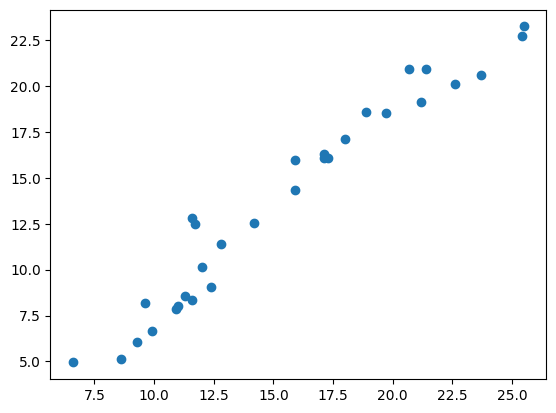

In [44]:
#Assumptions
##Plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [45]:
##residuals
residuals =y_test-y_pred_test
residuals

,Sales
168,0.997636
197,1.415142
147,2.648100
124,1.147927
140,3.060260
65,3.236161
151,3.275260
20,0.892517
71,3.367412
86,1.857837


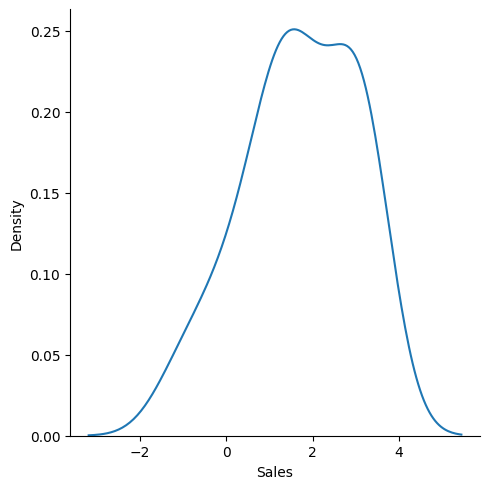

In [46]:
##Plotting these residuals

sns.displot(residuals,kind='kde')

<Axes: xlabel='TV', ylabel='Sales'>

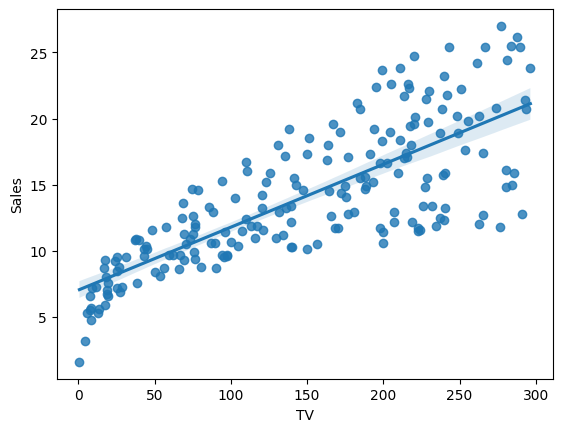

In [49]:
sns.regplot(x='TV',y='Sales',data=data)

<Axes: xlabel='Radio', ylabel='Sales'>

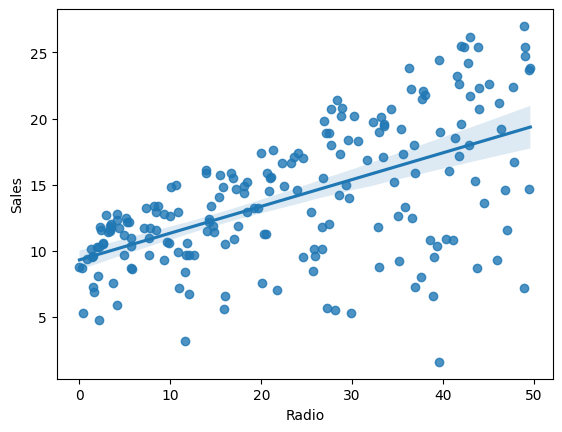

In [50]:
sns.regplot(x='Radio',y='Sales',data=data)

<Axes: xlabel='Newspaper', ylabel='Sales'>

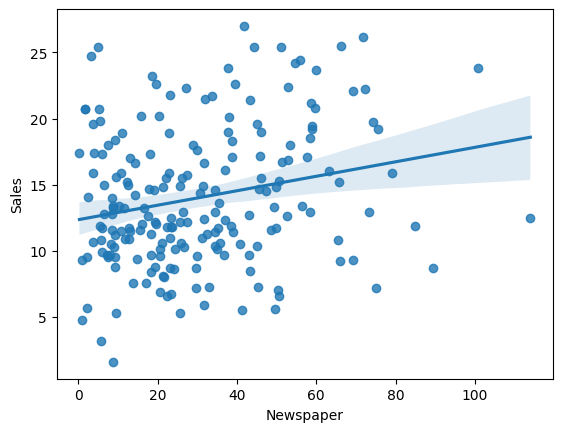

In [51]:
sns.regplot(x='Newspaper',y='Sales',data=data)

## Model Evaluation

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

1.8565475708576293
4.532827827925825
2.129043876467985


In [37]:
from sklearn.metrics import r2_score

In [38]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(R2_train," ",R2_test)

0.8881376220325201   0.8342193544832922
